In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.2 MB/s eta 0:00:00


2.2

4.999999999999998


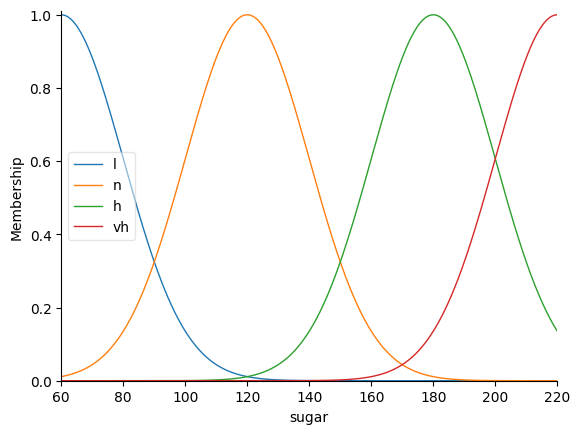

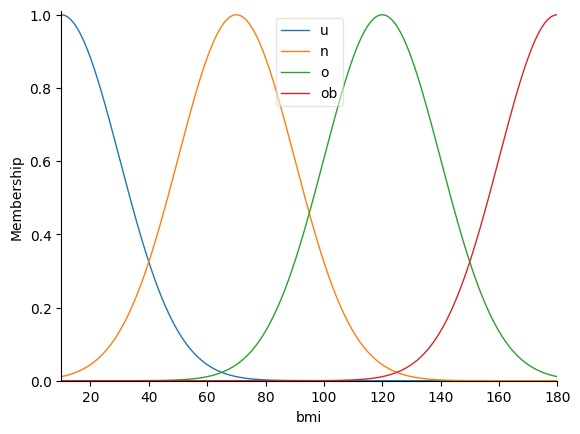

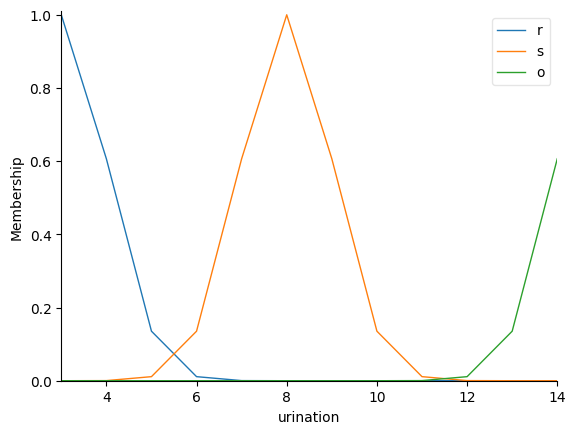

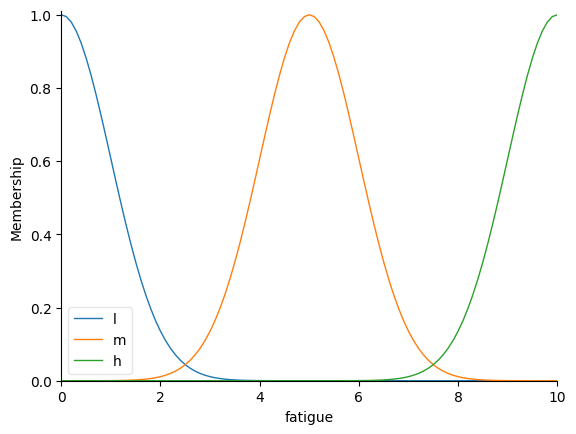

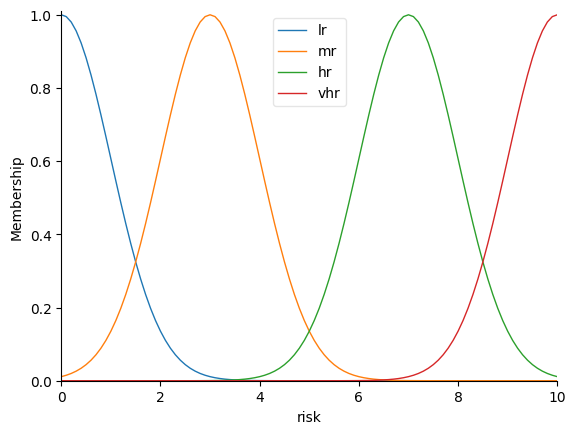

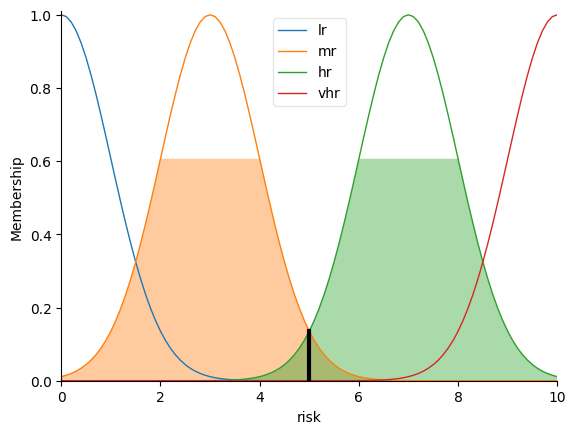

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

sugar = ctrl.Antecedent(np.arange(60,220.1,0.1),'sugar') #Antecedent = input
bmi = ctrl.Antecedent(np.arange(10,180.1,0.1),'bmi') #Consequent = ouput
urination = ctrl.Antecedent(np.arange(3,15,1),'urination')
fatigue = ctrl.Antecedent(np.arange(0,10.1,0.1),'fatigue')
risk = ctrl.Consequent(np.arange(0,10.1,0.1),'risk')

sugar['l'] = fuzz.gaussmf(sugar.universe,60,20)
sugar['n'] = fuzz.gaussmf(sugar.universe,120,20)
sugar['h'] = fuzz.gaussmf(sugar.universe,180,20)
sugar['vh'] = fuzz.gaussmf(sugar.universe,220,20)

bmi['u'] = fuzz.gaussmf(bmi.universe,10,20)
bmi['n'] = fuzz.gaussmf(bmi.universe,70,20)
bmi['o'] = fuzz.gaussmf(bmi.universe,120,20)
bmi['ob'] = fuzz.gaussmf(bmi.universe,180,20)

urination['r'] = fuzz.gaussmf(urination.universe,3,1)
urination['s'] = fuzz.gaussmf(urination.universe,8,1)
urination['o'] = fuzz.gaussmf(urination.universe,15,1)

fatigue['l'] = fuzz.gaussmf(fatigue.universe,0,1)
fatigue['m'] = fuzz.gaussmf(fatigue.universe,5,1)
fatigue['h'] = fuzz.gaussmf(fatigue.universe,10,1)

risk['lr'] = fuzz.gaussmf(fatigue.universe,0,1)
risk['mr'] = fuzz.gaussmf(fatigue.universe,3,1)
risk['hr'] = fuzz.gaussmf(fatigue.universe,7,1)
risk['vhr'] = fuzz.gaussmf(fatigue.universe,10,1)

sugar.view()
bmi.view()
urination.view()
fatigue.view()
risk.view()

rule1=ctrl.Rule(sugar['vh']&urination['o'],risk['vhr'])
rule2=ctrl.Rule(sugar['vh']&urination['s'],risk['hr'])
rule3=ctrl.Rule(sugar['h']&urination['o'],risk['hr'])
rule4=ctrl.Rule(sugar['n']&urination['r'],risk['lr'])

rule5=ctrl.Rule(sugar['vh']&bmi['ob'],risk['vhr'])
rule6=ctrl.Rule(sugar['vh']&bmi['o'],risk['hr'])
rule7=ctrl.Rule(sugar['vh']&bmi['n'],risk['hr'])
rule8=ctrl.Rule(sugar['vh']&bmi['u'],risk['mr'])
rule9=ctrl.Rule(sugar['vh']&bmi['ob'],risk['lr'])

rule10=ctrl.Rule(sugar['vh']&fatigue['h'],risk['vhr'])
rule11=ctrl.Rule(sugar['h']&fatigue['h'],risk['hr'])
rule12=ctrl.Rule(sugar['h']&fatigue['m'],risk['mr'])
rule13=ctrl.Rule(sugar['n']&fatigue['l'],risk['lr'])

risking_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
risking = ctrl.ControlSystemSimulation(risking_ctrl)
risking.input['sugar'] = 200
risking.input['bmi'] = 100
risking.input['urination'] = 10
risking.input['fatigue'] = 5
risking.compute()
print(risking.output['risk'])
risk.view(sim=risking)

2.3

Final Price: 5.3636410572915585


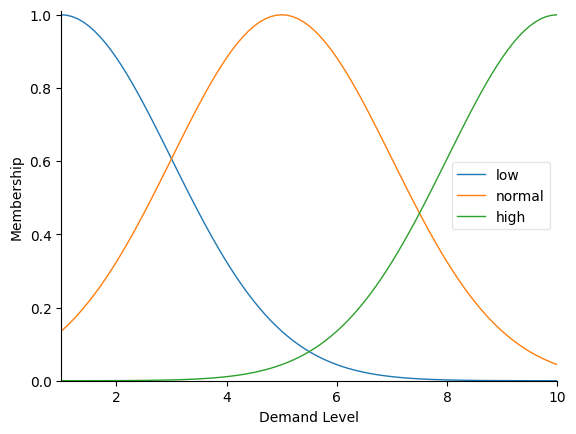

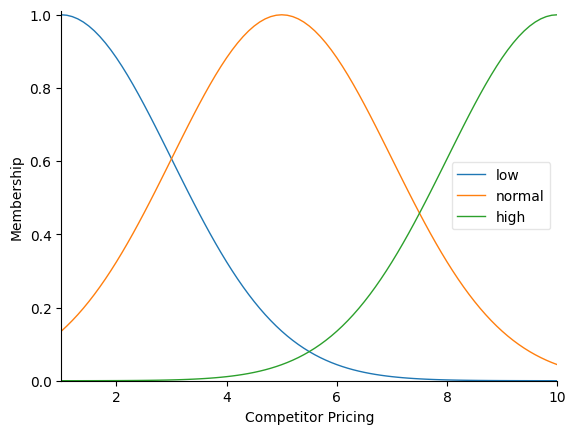

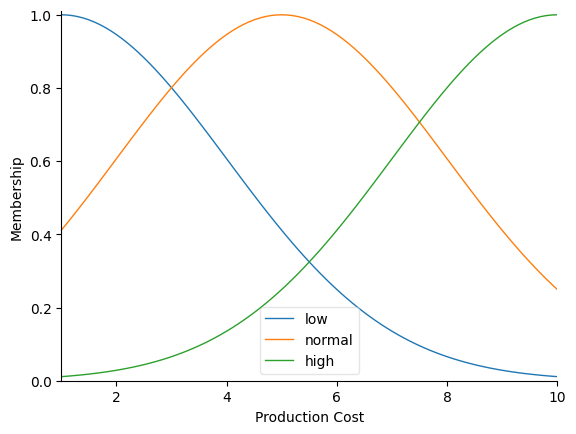

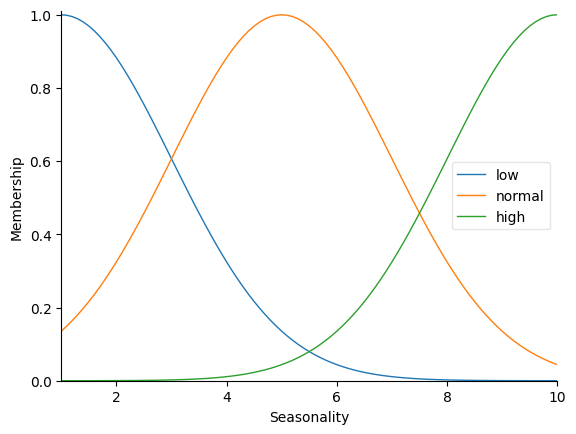

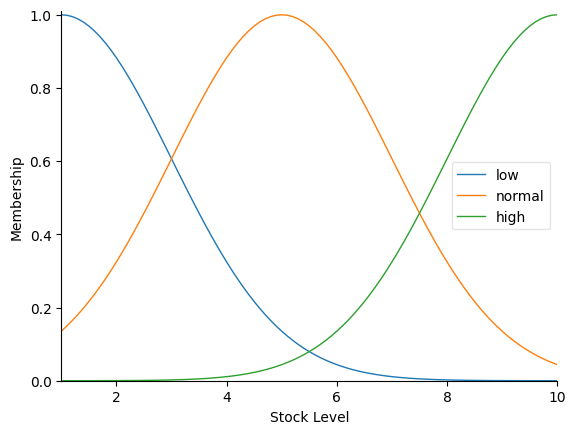

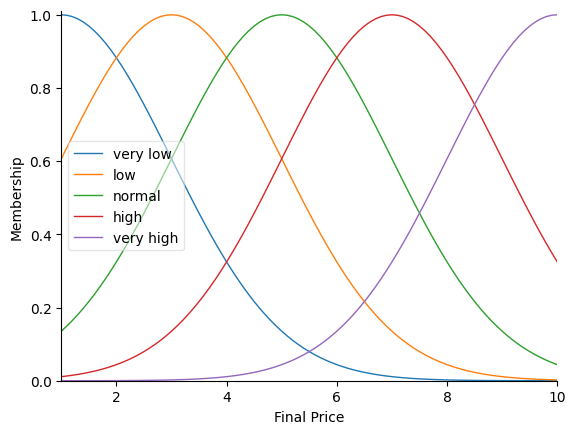

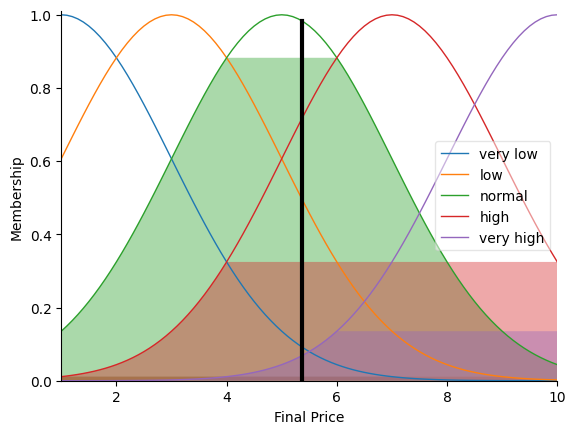

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
DL = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Demand Level')
CP = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Competitor Pricing')
PC = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Production Cost')
S = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Seasonality')
ST = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Stock Level')
FN = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Final Price')
DL['low'] = fuzz.gaussmf(DL.universe, 1, 2)
DL['normal'] = fuzz.gaussmf(DL.universe, 5, 2)
DL['high'] = fuzz.gaussmf(DL.universe, 10, 2)
CP['low'] = fuzz.gaussmf(CP.universe, 1, 2)
CP['normal'] = fuzz.gaussmf(CP.universe, 5, 2)
CP['high'] = fuzz.gaussmf(CP.universe, 10, 2)
PC['low'] = fuzz.gaussmf(PC.universe, 1, 3)
PC['normal'] = fuzz.gaussmf(PC.universe, 5, 3)
PC['high'] = fuzz.gaussmf(PC.universe, 10, 3)
S['low'] = fuzz.gaussmf(S.universe, 1, 2)
S['normal'] = fuzz.gaussmf(S.universe, 5, 2)
S['high'] = fuzz.gaussmf(S.universe, 10, 2)
ST['low'] = fuzz.gaussmf(ST.universe, 1, 2)
ST['normal'] = fuzz.gaussmf(ST.universe, 5, 2)
ST['high'] = fuzz.gaussmf(ST.universe, 10, 2)
FN['very low'] = fuzz.gaussmf(FN.universe, 1, 2)
FN['low'] = fuzz.gaussmf(FN.universe, 3, 2)
FN['normal'] = fuzz.gaussmf(FN.universe, 5, 2)
FN['high'] = fuzz.gaussmf(FN.universe, 7, 2)
FN['very high'] = fuzz.gaussmf(FN.universe, 10, 2)
DL.view()
CP.view()
PC.view()
S.view()
ST.view()
FN.view()

rule1 = ctrl.Rule(DL['high'] & CP['high'] & ST['low'], FN['very high'])
rule2 = ctrl.Rule(DL['high'] & S['high'] & ST['low'], FN['very high'])
rule3 = ctrl.Rule(DL['normal'] & PC['high'] & ST['low'], FN['very high'])
rule4 = ctrl.Rule(DL['high'] & CP['high'] & ST['normal'], FN['high'])
rule5 = ctrl.Rule(DL['normal'] & CP['high'] & ST['low'], FN['high'])
rule6 = ctrl.Rule(DL['high'] & S['normal'] & ST['normal'], FN['high'])
rule7 = ctrl.Rule(DL['normal'] & CP['normal'] & ST['normal'], FN['normal'])
rule8 = ctrl.Rule(DL['low'] & CP['high'] & ST['normal'], FN['normal'])
rule9 = ctrl.Rule(DL['normal'] & PC['normal'] & ST['normal'], FN['normal'])
rule10 = ctrl.Rule(DL['low'] & CP['low'] & ST['high'], FN['low'])
rule11 = ctrl.Rule(DL['normal'] & CP['low'] & ST['high'], FN['low'])
rule12 = ctrl.Rule(DL['low'] & S['low'] & ST['high'], FN['low'])
rule13 = ctrl.Rule(DL['low'] & CP['low'] & ST['high'], FN['very low'])
rule14 = ctrl.Rule(DL['low'] & S['low'] & ST['high'], FN['very low'])
rule15 = ctrl.Rule(DL['normal'] & CP['low'] & ST['high'], FN['very low'])
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Demand Level'] = 5
tipping.input['Competitor Pricing'] = 7
tipping.input['Production Cost'] = 4
tipping.input['Seasonality'] = 4
tipping.input['Stock Level'] = 4
tipping.compute()
print("Final Price:", tipping.output['Final Price'])
FN.view(sim=tipping)

2.4

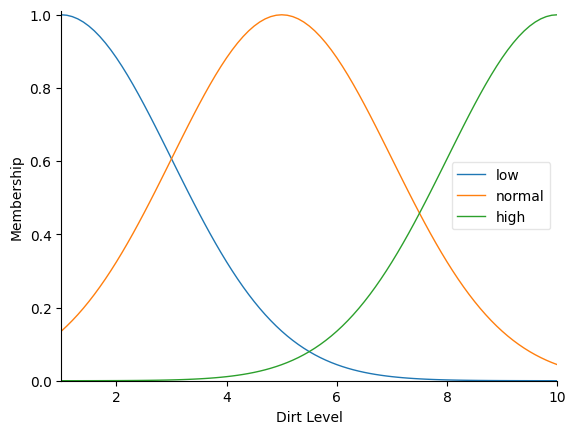

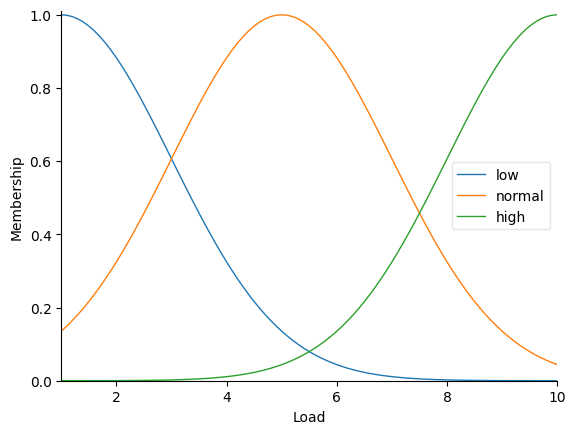

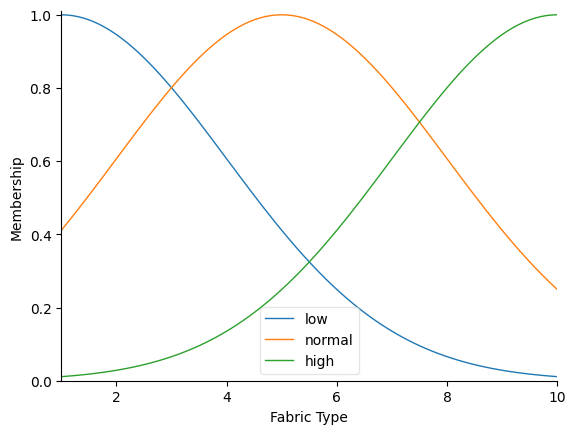

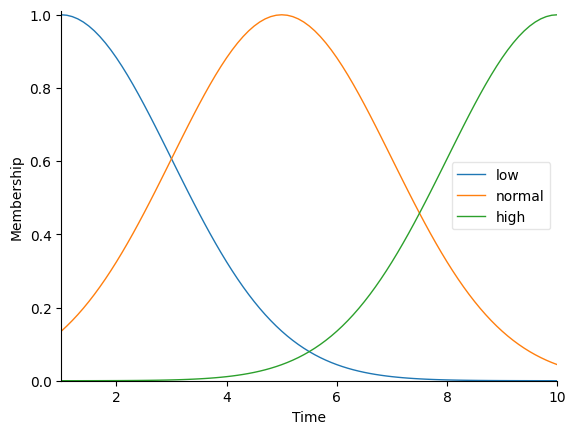

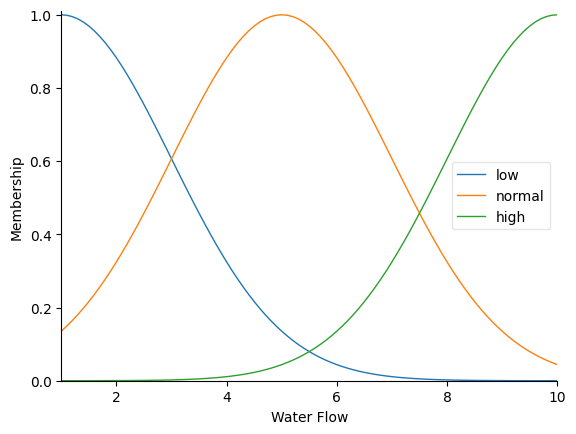

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
L = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Load')
DL = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Dirt Level')
FT = ctrl.Antecedent(np.arange(1, 10.1, 0.1), 'Fabric Type')
T = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Time')
WT = ctrl.Consequent(np.arange(1, 10.1, 0.1), 'Water Flow')
DL['low'] = fuzz.gaussmf(DL.universe, 1, 2)
DL['normal'] = fuzz.gaussmf(DL.universe, 5, 2)
DL['high'] = fuzz.gaussmf(DL.universe, 10, 2)

L['low'] = fuzz.gaussmf(L.universe, 1, 2)
L['normal'] = fuzz.gaussmf(L.universe, 5, 2)
L['high'] = fuzz.gaussmf(L.universe, 10, 2)

FT['low'] = fuzz.gaussmf(FT.universe, 1, 3)
FT['normal'] = fuzz.gaussmf(FT.universe, 5, 3)
FT['high'] = fuzz.gaussmf(FT.universe, 10, 3)

T['low'] = fuzz.gaussmf(T.universe, 1, 2)
T['normal'] = fuzz.gaussmf(T.universe, 5, 2)
T['high'] = fuzz.gaussmf(T.universe, 10, 2)

WT['low'] = fuzz.gaussmf(WT.universe, 1, 2)
WT['normal'] = fuzz.gaussmf(WT.universe, 5, 2)
WT['high'] = fuzz.gaussmf(WT.universe, 10, 2)

DL.view()
L.view()
FT.view()
T.view()
WT.view()


Water Flow: 4.7881435780261254
Time: 5.401412366587371


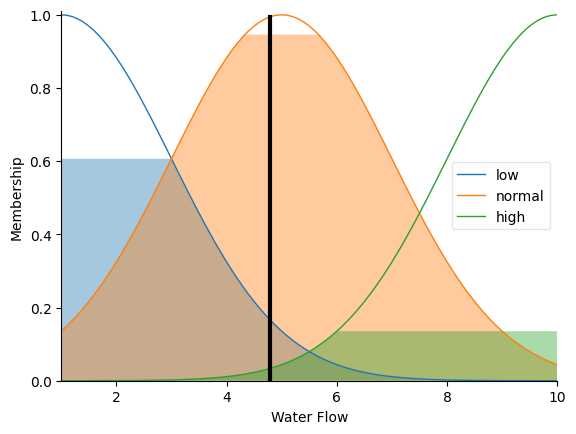

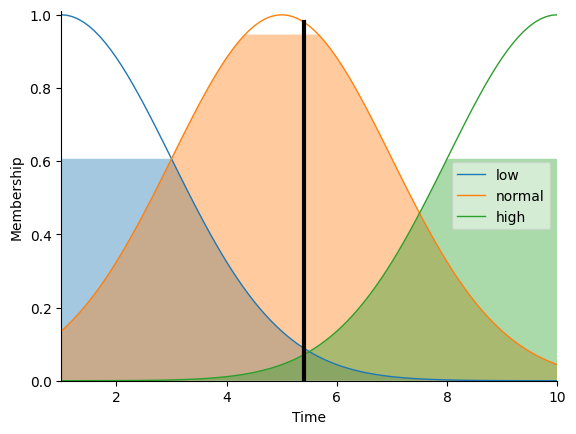

In [ ]:
rule1 = ctrl.Rule(L['low'] & DL['low'], (T['low'], WT['low']))
rule2 = ctrl.Rule(L['low'] & DL['normal'], (T['normal'], WT['normal']))
rule3 = ctrl.Rule(L['low'] & DL['high'], (T['high'], WT['normal']))
rule4 = ctrl.Rule(L['normal'] & DL['low'], (T['normal'], WT['normal']))
rule5 = ctrl.Rule(L['normal'] & DL['normal'], (T['high'], WT['normal']))
rule6 = ctrl.Rule(L['normal'] & DL['high'], (T['high'], WT['high']))
rule7 = ctrl.Rule(L['high'] & DL['low'], (T['normal'], WT['high']))
rule8 = ctrl.Rule(L['high'] & DL['high'], (T['high'], WT['high']))

rule9 = ctrl.Rule(FT['low'], (T['low'], WT['low']))
rule10 = ctrl.Rule(FT['normal'], (T['normal'], WT['normal']))
rule11 = ctrl.Rule(FT['high'], (T['high'], WT['high']))

rule12 = ctrl.Rule(L['low'] & DL['low'] & FT['low'], (T['low'], WT['low']))
rule13 = ctrl.Rule(L['normal'] & DL['normal'] & FT['normal'], (T['normal'], WT['normal']))
rule14 = ctrl.Rule(L['high'] & DL['high'] & FT['high'], (T['high'], WT['high']))

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Dirt Level'] = 5
tipping.input['Load'] = 7
tipping.input['Fabric Type'] = 4

tipping.compute()

print("Water Flow:", tipping.output['Water Flow'])
print("Time:", tipping.output['Time'])
WT.view(sim=tipping)
T.view(sim=tipping)

2.5

75.02115071359708
2.003634680226025


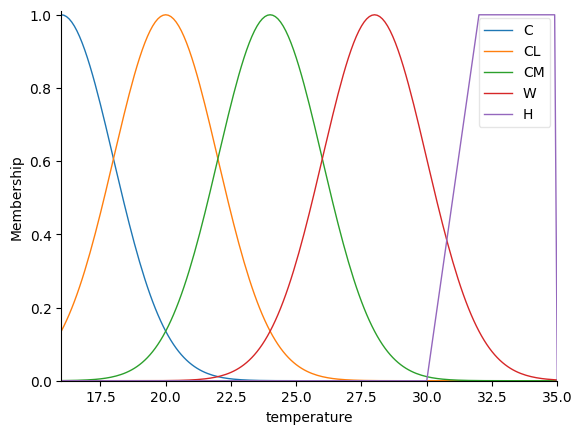

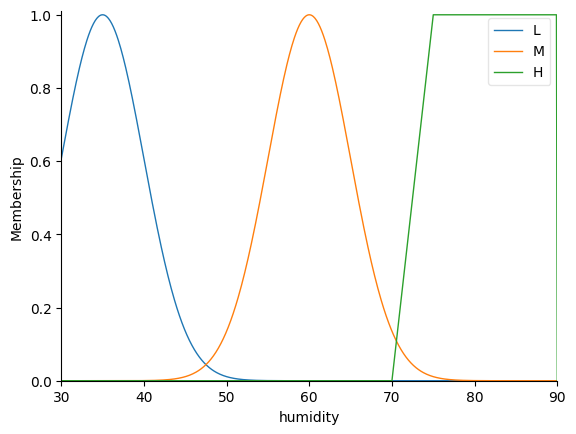

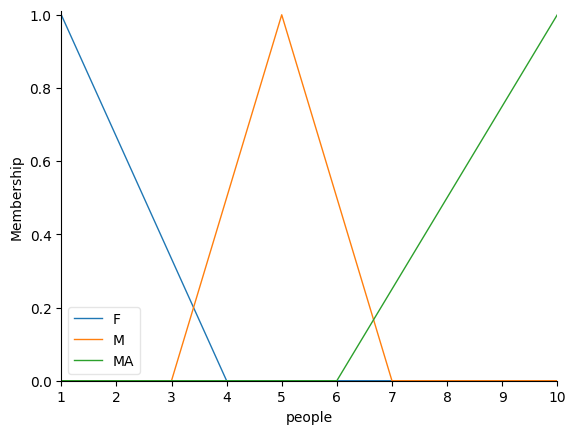

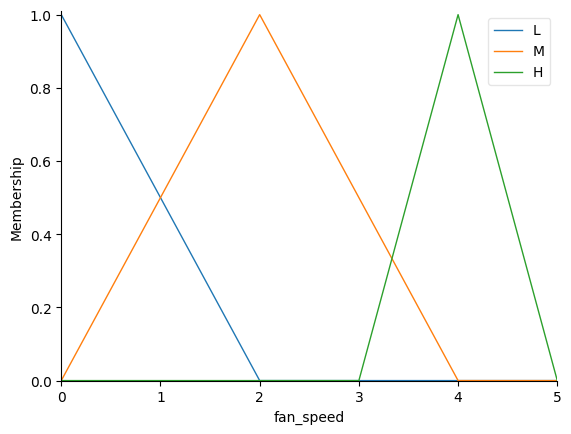

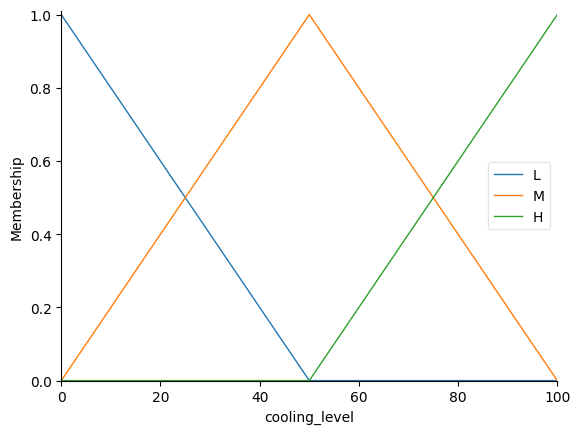

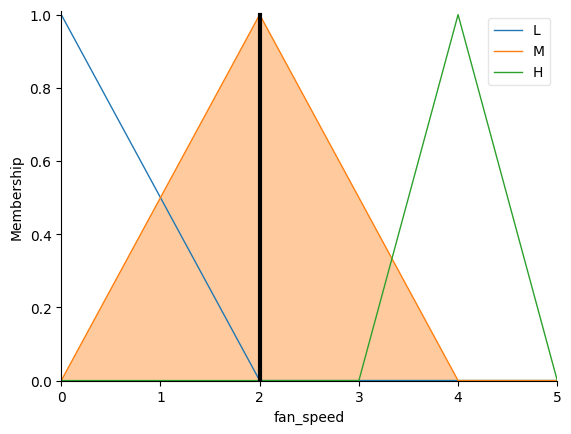

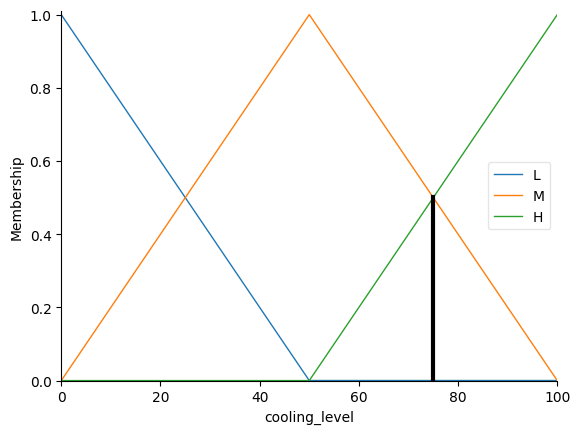

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(16, 35.1, 0.1), 'temperature')
humidity = ctrl.Antecedent(np.arange(30, 90.1, 0.1), 'humidity')
people = ctrl.Antecedent(np.arange(1, 10.1, 1), 'people')
fan_speed = ctrl.Consequent(np.arange(0, 5.1, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'cooling_level')

temperature['C'] = fuzz.gaussmf(temperature.universe, 16, 2)
temperature['CL'] = fuzz.gaussmf(temperature.universe, 20, 2)
temperature['CM'] = fuzz.gaussmf(temperature.universe, 24, 2)
temperature['W'] = fuzz.gaussmf(temperature.universe, 28, 2)
temperature['H'] = fuzz.trapmf(temperature.universe, [30, 32, 35, 35])

humidity['L'] = fuzz.gaussmf(humidity.universe, 35, 5)
humidity['M'] = fuzz.gaussmf(humidity.universe, 60, 5)
humidity['H'] = fuzz.trapmf(humidity.universe, [70, 75, 90, 90])

people['F'] = fuzz.trimf(people.universe, [1, 1, 4])
people['M'] = fuzz.trimf(people.universe, [3, 5, 7])
people['MA'] = fuzz.trimf(people.universe, [6, 10, 10])

fan_speed['L'] = fuzz.trimf(fan_speed.universe, [0, 0, 2])
fan_speed['M'] = fuzz.trimf(fan_speed.universe, [0, 2, 4])
fan_speed['H'] = fuzz.trimf(fan_speed.universe, [3, 4, 5])

cooling_level['L'] = fuzz.trimf(cooling_level.universe, [0, 0, 50])
cooling_level['M'] = fuzz.trimf(cooling_level.universe, [0, 50, 100])
cooling_level['H'] = fuzz.trimf(cooling_level.universe, [50, 100, 100])

temperature.view()
humidity.view()
people.view()
fan_speed.view()
cooling_level.view()

rule1 =ctrl.Rule(temperature['C'] , fan_speed['L'])
rule2 =ctrl.Rule(temperature['CL'] , fan_speed['L'])
rule3 =ctrl.Rule(temperature['CM'] , fan_speed['M'])
rule4 =ctrl.Rule(temperature['W'] , fan_speed['H'])
rule5 =ctrl.Rule(temperature['H'] , fan_speed['H'])

rule6 =ctrl.Rule(temperature['C'] , cooling_level['L'])
rule7 =ctrl.Rule(temperature['CL'] , cooling_level['L'])
rule8 =ctrl.Rule(temperature['CM'] , cooling_level['M'])
rule9 =ctrl.Rule(temperature['W'] , cooling_level['H'])
rule10 =ctrl.Rule(temperature['H'] , cooling_level['H'])

rule11 =ctrl.Rule(humidity['L'], fan_speed['L'])
rule12 =ctrl.Rule(humidity['M'], fan_speed['M'])
rule13 =ctrl.Rule(humidity['H'], fan_speed['H'])

rule14 =ctrl.Rule(people['F'], fan_speed['L'])
rule15 =ctrl.Rule(people['M'], fan_speed['M'])
rule16 =ctrl.Rule(people['MA'], fan_speed['H'])

rule17 = ctrl.Rule(temperature['H'] & humidity['H'] & people['MA'], [cooling_level['H'],fan_speed['H']])
rule18 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], [cooling_level['M'],fan_speed['M']])
rule19 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], [cooling_level['L'],fan_speed['L']])

fanspeed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
fanspeed= ctrl.ControlSystemSimulation(fanspeed_ctrl)
fanspeed.input['temperature'] = 62
fanspeed.input['humidity'] = 90
fanspeed.input['people'] = 5
fanspeed.compute()
print(fanspeed.output['cooling_level'])
print(fanspeed.output['fan_speed'])
fan_speed.view(sim=fanspeed)
cooling_level.view(sim=fanspeed)

2.6

11.120019845008533
59.99859456616396


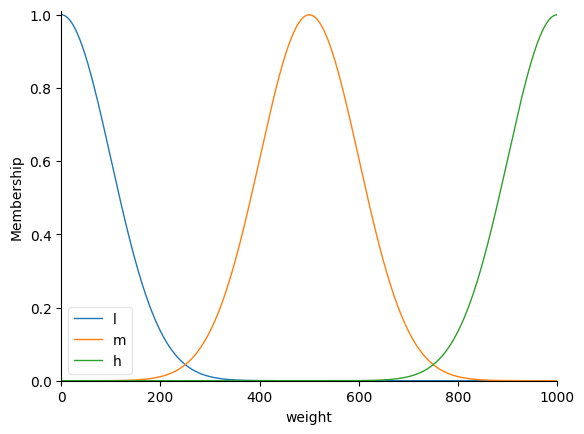

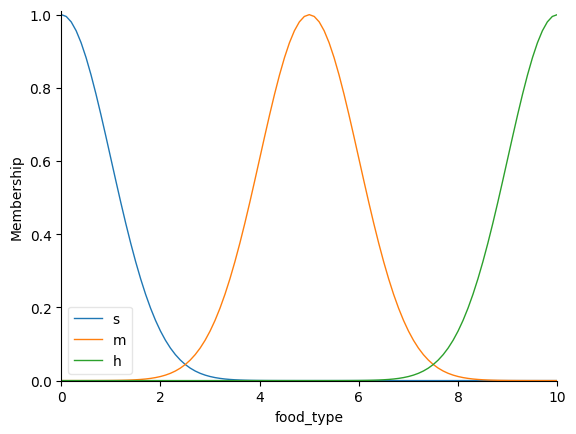

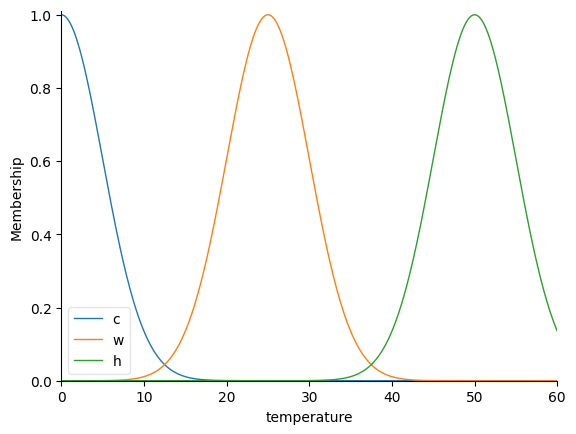

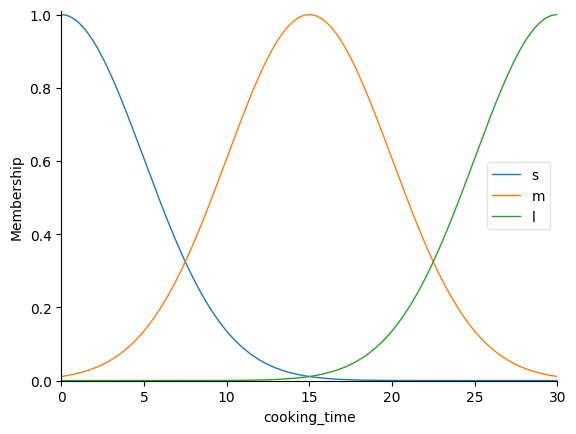

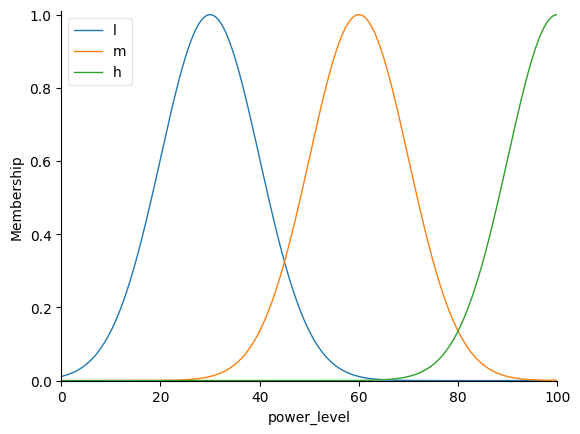

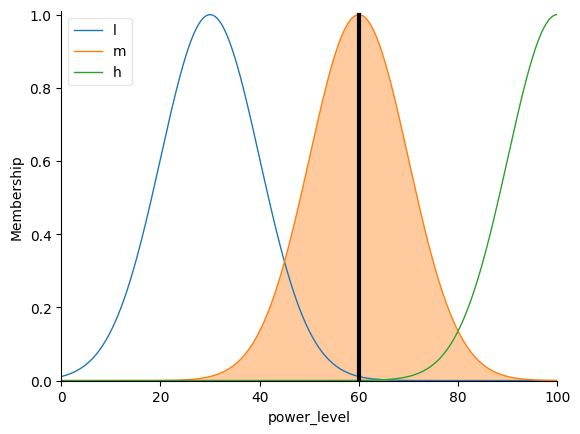

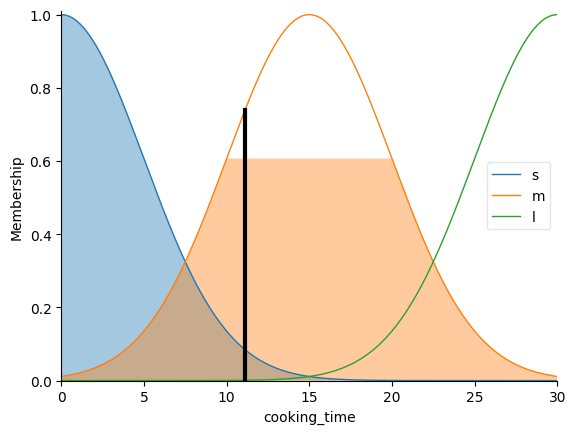

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight = ctrl.Antecedent(np.arange(0, 1000.1, 0.1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'food_type')
temperature = ctrl.Antecedent(np.arange(0, 60.1, 0.1), 'temperature')
cooking_time = ctrl.Consequent(np.arange(0, 30.1, 0.1), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'power_level')

weight['l'] = fuzz.gaussmf(weight.universe, 0, 100)
weight['m'] = fuzz.gaussmf(weight.universe, 500, 100)
weight['h'] = fuzz.gaussmf(weight.universe, 1000, 100)

food_type['s'] = fuzz.gaussmf(food_type.universe, 0, 1)
food_type['m'] = fuzz.gaussmf(food_type.universe, 5, 1)
food_type['h'] = fuzz.gaussmf(food_type.universe, 10, 1)

temperature['c'] = fuzz.gaussmf(temperature.universe, 0, 5)
temperature['w'] = fuzz.gaussmf(temperature.universe, 25, 5)
temperature['h'] = fuzz.gaussmf(temperature.universe, 50, 5)

cooking_time['s'] = fuzz.gaussmf(cooking_time.universe, 0, 5)
cooking_time['m'] = fuzz.gaussmf(cooking_time.universe, 15, 5)
cooking_time['l'] = fuzz.gaussmf(cooking_time.universe, 30, 5)

power_level['l'] = fuzz.gaussmf(power_level.universe, 30, 10)
power_level['m'] = fuzz.gaussmf(power_level.universe, 60, 10)
power_level['h'] = fuzz.gaussmf(power_level.universe, 100, 10)

weight.view()
food_type.view()
temperature.view()
cooking_time.view()
power_level.view()

rule1 = ctrl.Rule(weight['l'], cooking_time['s'])
rule2 = ctrl.Rule(weight['m'], cooking_time['m'])
rule3 = ctrl.Rule(weight['h'], cooking_time['l'])

rule4 = ctrl.Rule(food_type['s'], power_level['l'])
rule5 = ctrl.Rule(food_type['m'], power_level['m'])
rule6 = ctrl.Rule(food_type['h'], power_level['h'])

rule7 = ctrl.Rule(temperature['c'], cooking_time['l'])
rule8 = ctrl.Rule(temperature['w'], cooking_time['m'])
rule9 = ctrl.Rule(temperature['h'], cooking_time['s'])

rule10 = ctrl.Rule(weight['h'] & food_type['h'] & temperature['c'], [cooking_time['l'], power_level['h']])
rule11 = ctrl.Rule(weight['m'] & food_type['s'] & temperature['w'], [cooking_time['m'], power_level['l']])
rule12 = ctrl.Rule(weight['l'] & food_type['m'] & temperature['h'], [cooking_time['s'], power_level['m']])

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['weight'] = 600
cooking.input['food_type'] = 5
cooking.input['temperature'] = 50
cooking.compute()
print(cooking.output['cooking_time'])
print(cooking.output['power_level'])
power_level.view(sim=cooking)
cooking_time.view(sim=cooking)

2.7

Cooking Time: 5.000000000000013
Heat Level: 66.11111111111123


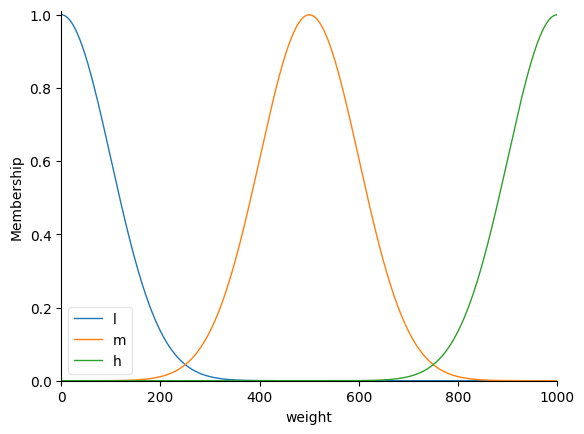

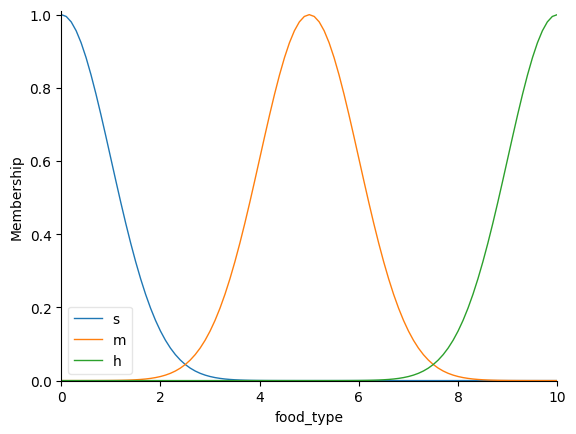

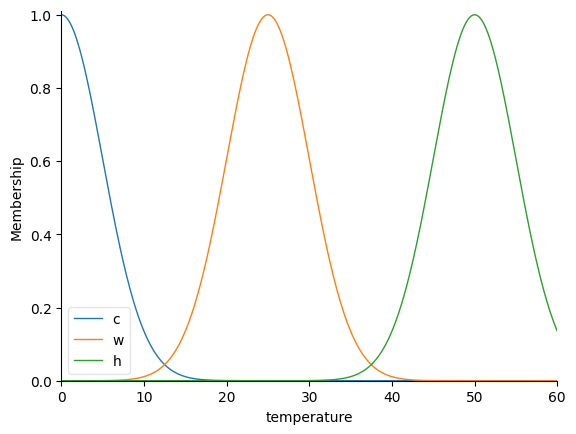

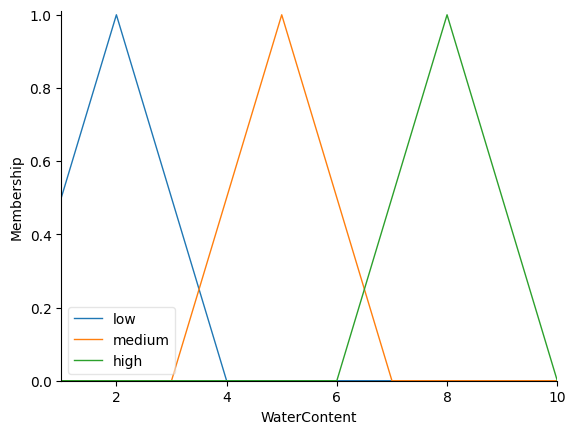

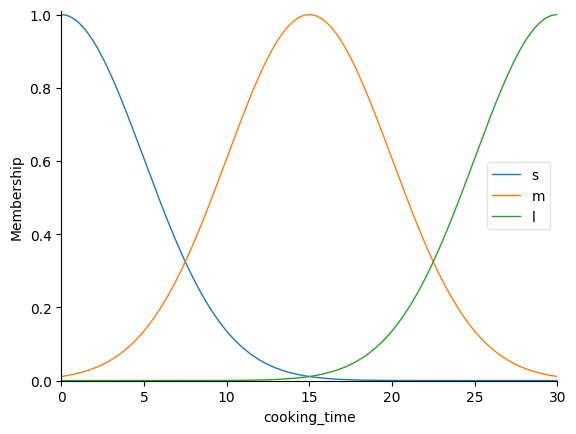

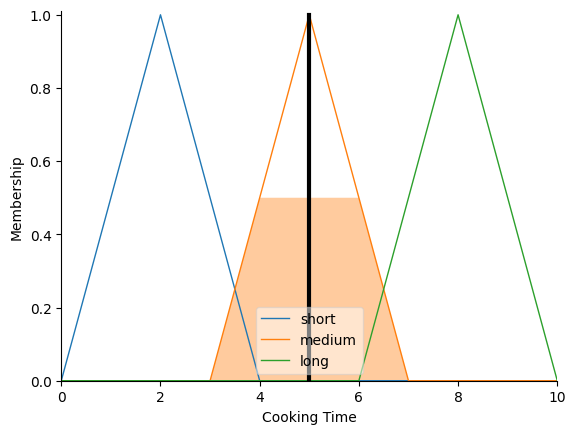

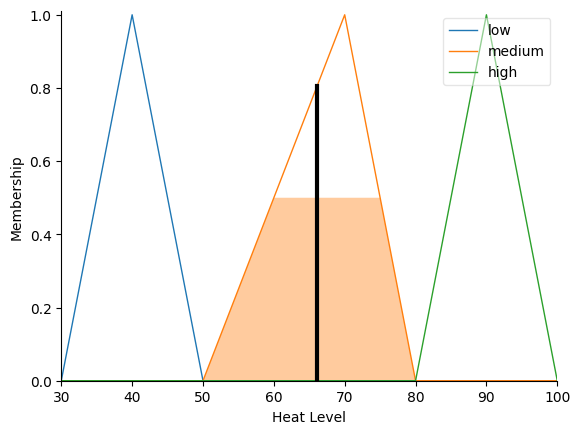

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

FoodType=ctrl.Antecedent(np.arange(1,10.1,0.1),'FoodType')
FoodWeight=ctrl.Antecedent(np.arange(1,10.1,0.1),'FoodWeight')
InitialTemperature=ctrl.Antecedent(np.arange(0, 60.1, 10),'InitialTemperature')
WaterContent=ctrl.Antecedent(np.arange(1,10.1,0.1),'WaterContent')

CT = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Cooking Time')
HL = ctrl.Consequent(np.arange(30, 100.1, 10), 'Heat Level')

FoodType['soft'] = fuzz.trimf(FoodType.universe, [0, 2, 4])
FoodType['medium'] = fuzz.trimf(FoodType.universe, [3, 5, 7])
FoodType['hard'] = fuzz.trimf(FoodType.universe, [6, 8, 10])

FoodWeight['light'] = fuzz.trimf(FoodWeight.universe, [0, 2, 4])
FoodWeight['medium'] = fuzz.trimf(FoodWeight.universe, [3, 5, 7])
FoodWeight['heavy'] = fuzz.trimf(FoodWeight.universe, [6, 8, 10])

InitialTemperature['cold'] = fuzz.trimf(InitialTemperature.universe, [0 , 10 , 20])
InitialTemperature['warm'] = fuzz.trimf(InitialTemperature.universe, [20 , 30 , 40])
InitialTemperature['hot'] = fuzz.trimf(InitialTemperature.universe, [40, 50 , 60])

WaterContent['low'] = fuzz.trimf(WaterContent.universe, [0, 2, 4])
WaterContent['medium'] = fuzz.trimf(WaterContent.universe, [3, 5, 7])
WaterContent['high'] = fuzz.trimf(WaterContent.universe, [6, 8, 10])

CT['short'] = fuzz.trimf(CT.universe, [0, 2, 4])
CT['medium'] = fuzz.trimf(CT.universe, [3, 5, 7])
CT['long'] = fuzz.trimf(CT.universe, [6, 8, 10])

HL['low'] = fuzz.trimf(HL.universe, [30, 40 , 50])
HL['medium'] = fuzz.trimf(HL.universe, [50,70,80])
HL['high'] = fuzz.trimf(HL.universe, [80,90, 100])

weight.view()
food_type.view()
temperature.view()
WaterContent.view()
cooking_time.view()

rule1 = ctrl.Rule(FoodType['soft'] & FoodWeight['light'], CT['short'])
rule2 = ctrl.Rule(FoodType['medium'] & FoodWeight['light'], CT['medium'])
rule3 = ctrl.Rule(FoodType['hard'] & FoodWeight['light'], CT['long'])
rule4 = ctrl.Rule(FoodType['soft'] & FoodWeight['medium'], CT['medium'])
rule5 = ctrl.Rule(FoodType['medium'] & FoodWeight['medium'], CT['medium'])
rule6 = ctrl.Rule(FoodType['hard'] & FoodWeight['medium'], CT['long'])
rule7 = ctrl.Rule(FoodType['soft'] & FoodWeight['heavy'], CT['medium'])
rule8 = ctrl.Rule(FoodType['medium'] & FoodWeight['heavy'], CT['long'])
rule9 = ctrl.Rule(FoodType['hard'] & FoodWeight['heavy'], CT['long'])

rule10 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['low'], CT['medium'])
rule11 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['low'], CT['medium'])
rule12 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['low'], CT['short'])
rule13 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['medium'], CT['long'])
rule14 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['medium'], CT['medium'])
rule15 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['medium'], CT['medium'])
rule16 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['high'], CT['long'])
rule17 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['high'], CT['long'])
rule18 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['high'], CT['medium'])

rule19 = ctrl.Rule(FT['soft'] & FoodWeight['light'], HL['low'])
rule20= ctrl.Rule(FT['medium'] & FoodWeight['light'], HL['medium'])
rule21 = ctrl.Rule(FT['hard'] & FoodWeight['light'], HL['medium'])
rule22 = ctrl.Rule(FT['soft'] & FoodWeight['medium'], HL['medium'])
rule23 = ctrl.Rule(FT['medium'] & FoodWeight['medium'], HL['medium'])
rule24 = ctrl.Rule(FT['hard'] & FoodWeight['medium'], HL['high'])
rule25 = ctrl.Rule(FT['soft'] & FoodWeight['heavy'], HL['medium'])
rule26 = ctrl.Rule(FT['medium'] & FoodWeight['heavy'], HL['high'])
rule27 = ctrl.Rule(FT['hard'] & FoodWeight['heavy'], HL['high'])

rule28 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['low'], HL['high'])
rule29 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['low'], HL['medium'])
rule30 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['low'], HL['low'])
rule31 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['medium'], HL['medium'])
rule32 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['medium'], HL['medium'])
rule33 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['medium'], HL['medium'])
rule34 = ctrl.Rule(InitialTemperature['cold'] & WaterContent['high'], HL['high'])
rule35 = ctrl.Rule(InitialTemperature['warm'] & WaterContent['high'], HL['high'])
rule36 = ctrl.Rule(InitialTemperature['hot'] & WaterContent['high'], HL['medium'])

cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,
rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)

cooking.input['FoodType'] = 10
cooking.input['FoodWeight'] = 700
cooking.input['InitialTemperature'] = 30
cooking.input['WaterContent'] = 6
cooking.compute()
print(f"Cooking Time: {cooking.output['Cooking Time']}")
print(f"Heat Level: {cooking.output['Heat Level']}")
CT.view(sim=cooking)
HL.view(sim=cooking)

2.8

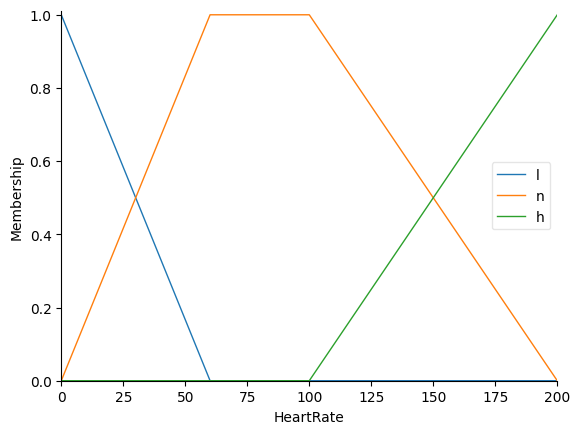

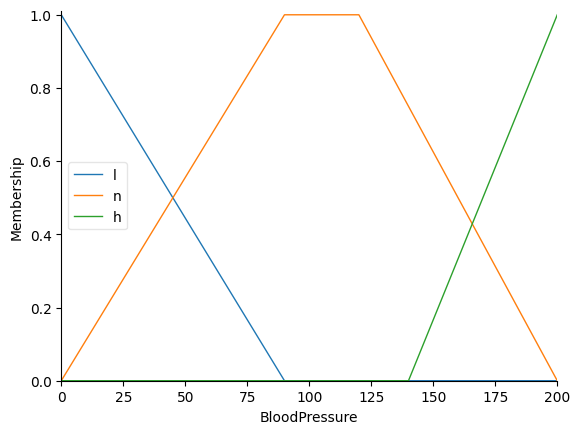

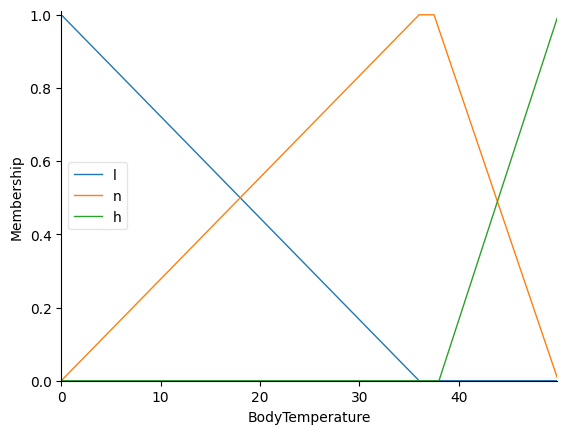

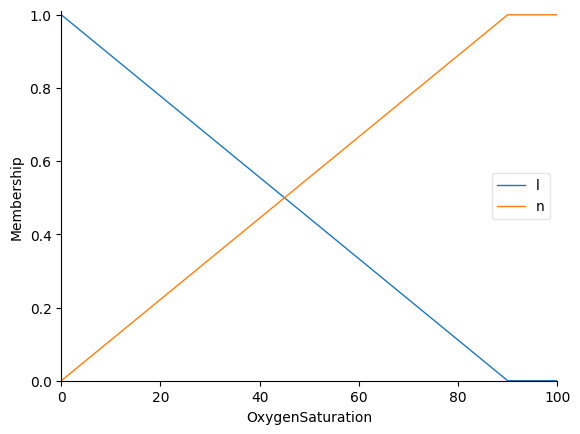

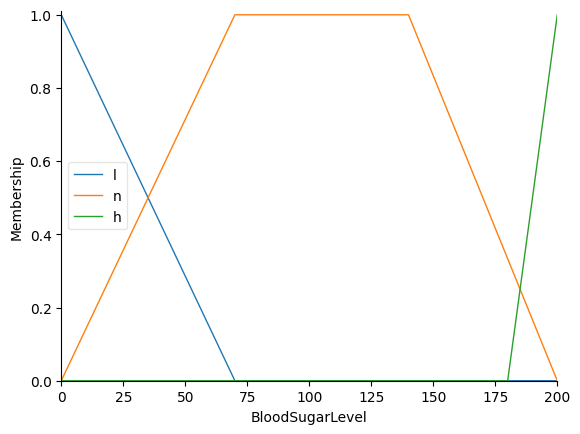

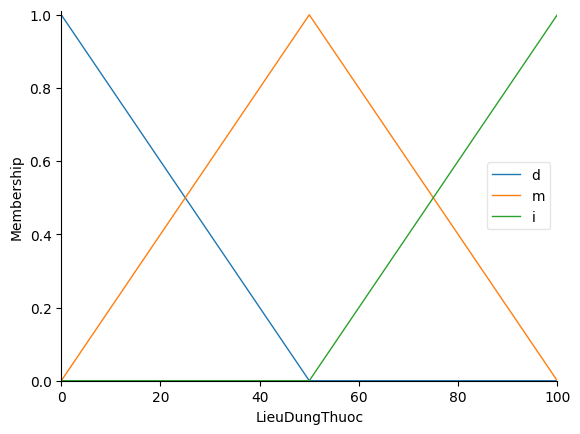

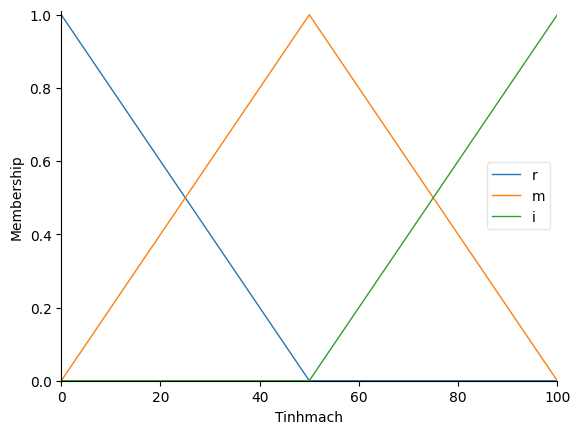

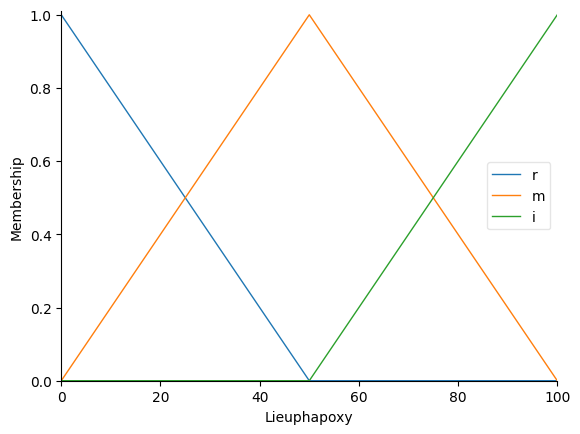

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
HeartRate = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'HeartRate')
BloodPressure = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'BloodPressure')
BodyTemperature = ctrl.Antecedent(np.arange(0, 50, 0.1), 'BodyTemperature')
OxygenSaturation = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'OxygenSaturation')
BloodSugarLevel = ctrl.Antecedent(np.arange(0, 200.1, 0.1), 'BloodSugarLevel')
LieuDungThuoc = ctrl.Consequent(np.arange(0, 100.1, 0.1), 'LieuDungThuoc')
Tinhmach= ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Tinhmach')
Lieuphapoxy= ctrl.Consequent(np.arange(0, 100.1, 0.1), 'Lieuphapoxy')

HeartRate['l'] = fuzz.trimf(HeartRate.universe,[0,0,60])
HeartRate['n'] = fuzz.trapmf(HeartRate.universe,[0,60,100,200])
HeartRate['h'] = fuzz.trimf(HeartRate.universe,[100,200,200])

BloodPressure['l'] = fuzz.trimf(BloodPressure.universe,[0,0,90])
BloodPressure['n'] = fuzz.trapmf(BloodPressure.universe,[0,90,120,200])
BloodPressure['h'] = fuzz.trimf(BloodPressure.universe,[140,200,200])

BodyTemperature['l'] = fuzz.trimf(BodyTemperature.universe,[0,0,36])
BodyTemperature['n'] = fuzz.trapmf(BodyTemperature.universe,[0,36,37.5,50])
BodyTemperature['h'] = fuzz.trimf(BodyTemperature.universe,[38,50,50])

OxygenSaturation['l'] = fuzz.trimf(OxygenSaturation.universe,[0,0,90])
OxygenSaturation['n'] = fuzz.trapmf(OxygenSaturation.universe,[0,90,100,100])

BloodSugarLevel['l'] = fuzz.trimf(BloodSugarLevel.universe,[0,0,70])
BloodSugarLevel['n'] = fuzz.trapmf(BloodSugarLevel.universe,[0,70,140,200])
BloodSugarLevel['h'] = fuzz.trimf(BloodSugarLevel.universe,[180,200,200])

LieuDungThuoc['d'] = fuzz.trimf(LieuDungThuoc.universe,[0,0,50])
LieuDungThuoc['m'] = fuzz.trimf(LieuDungThuoc.universe,[0,50,100])
LieuDungThuoc['i'] = fuzz.trimf(LieuDungThuoc.universe,[50,100,100])

Tinhmach['r'] = fuzz.trimf(Tinhmach.universe,[0,0,50])
Tinhmach['m'] = fuzz.trimf(Tinhmach.universe,[0,50,100])
Tinhmach['i'] = fuzz.trimf(Tinhmach.universe,[50,100,100])

Lieuphapoxy['r'] = fuzz.trimf(Lieuphapoxy.universe,[0,0,50])
Lieuphapoxy['m'] = fuzz.trimf(Lieuphapoxy.universe,[0,50,100])
Lieuphapoxy['i'] = fuzz.trimf(Lieuphapoxy.universe,[50,100,100])

HeartRate.view()
BloodPressure.view()
BodyTemperature.view()
OxygenSaturation.view()
BloodSugarLevel.view()
LieuDungThuoc.view()
Tinhmach.view()
Lieuphapoxy.view()




LieuDungThuoc: 50.00000000000007
Tinhmach: 49.99999999999977
Lieuphapoxy: 49.99999999999977


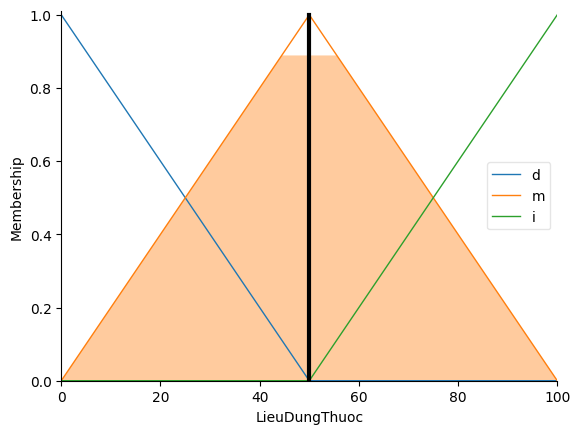

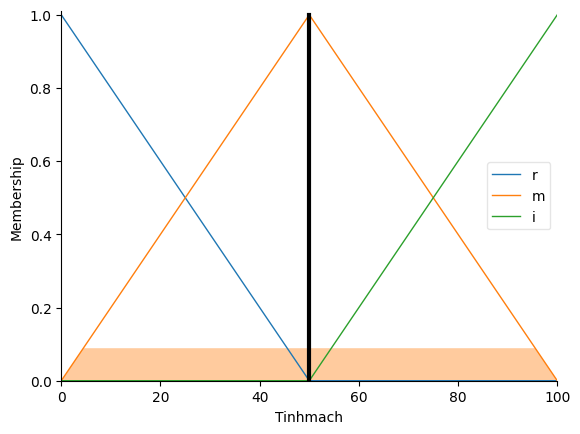

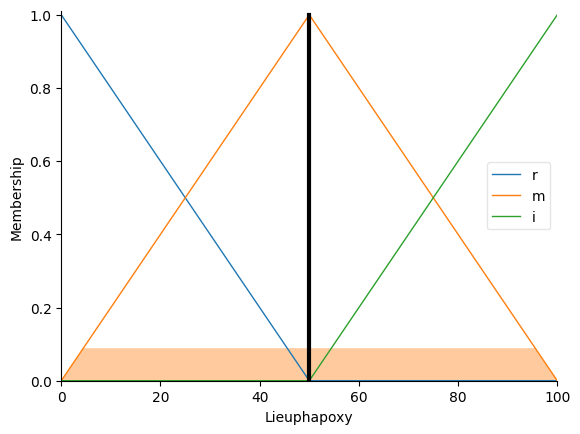

In [ ]:
rule1 = ctrl.Rule(HeartRate['l'] & BloodPressure['l'], (LieuDungThuoc['i'], Tinhmach['i']))
rule2 = ctrl.Rule(HeartRate['h'] & BloodPressure['h'], (LieuDungThuoc['d']))
rule3 = ctrl.Rule(HeartRate['n'] & BloodPressure['n'], (LieuDungThuoc['m']))

rule4= ctrl.Rule(BodyTemperature['h'] & OxygenSaturation['l'], (Lieuphapoxy['i'], LieuDungThuoc['i']))
rule5= ctrl.Rule(BodyTemperature['n'] & OxygenSaturation['n'], (Lieuphapoxy['m'], LieuDungThuoc['m'], Tinhmach['m']))
rule6= ctrl.Rule(BodyTemperature['l'] & OxygenSaturation['l'], (Lieuphapoxy['i'], LieuDungThuoc['i']))

rule7= ctrl.Rule(BloodSugarLevel['l'], LieuDungThuoc['i'])
rule8= ctrl.Rule(BloodSugarLevel['l'], LieuDungThuoc['d'])

rule9= ctrl.Rule(BloodSugarLevel['h'] & HeartRate['h'] & BloodPressure['h'], (LieuDungThuoc['d']))
rule10= ctrl.Rule(OxygenSaturation['l'] & HeartRate['l'] & BloodPressure['l'], (LieuDungThuoc['i'], Tinhmach['i'], Lieuphapoxy['i']))
rule11= ctrl.Rule(BodyTemperature['h'] & OxygenSaturation['n'] & BloodPressure['h'], (LieuDungThuoc['i'], Lieuphapoxy['m']))

ketqua_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
ketqua = ctrl.ControlSystemSimulation(ketqua_ctrl)
ketqua.input['HeartRate'] = 75
ketqua.input['BloodPressure'] = 80
ketqua.input['BodyTemperature'] = 36
ketqua.input['OxygenSaturation'] = 8
ketqua.input['BloodSugarLevel'] = 80

ketqua.compute()

print("LieuDungThuoc:", ketqua.output['LieuDungThuoc'])
print("Tinhmach:", ketqua.output['Tinhmach'])
print("Lieuphapoxy:", ketqua.output['Lieuphapoxy'])
LieuDungThuoc.view(sim=ketqua)
Tinhmach.view(sim=ketqua)
Lieuphapoxy.view(sim=ketqua)

2.9

0.5583812815846352


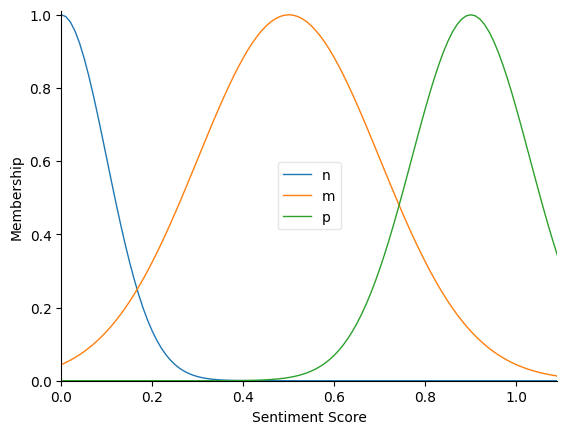

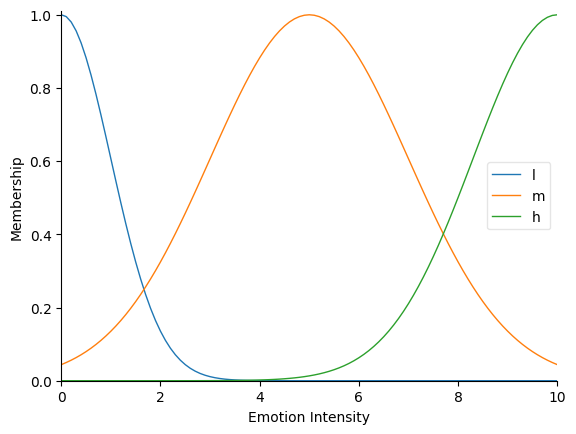

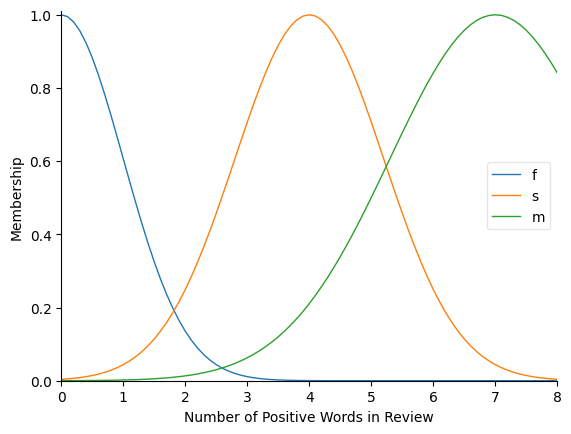

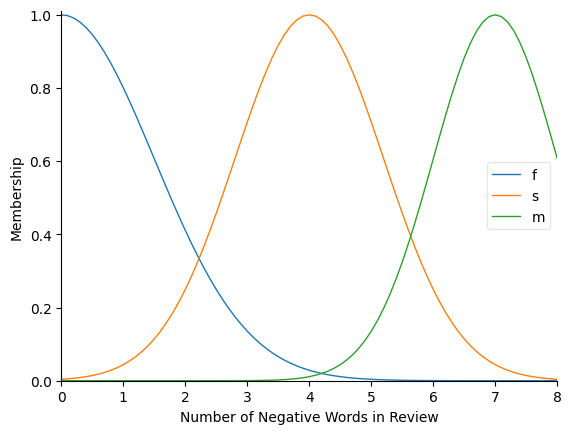

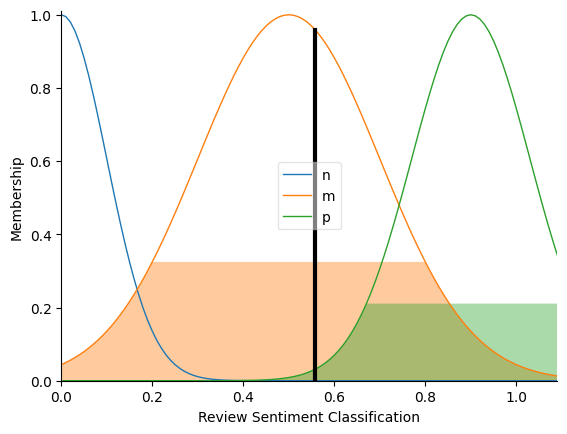

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

SS = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'Sentiment Score')
EI = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Emotion Intensity')
NPWR = ctrl.Antecedent(np.arange(0, 8.1, 0.1), 'Number of Positive Words in Review')
NNWR = ctrl.Antecedent(np.arange(0, 8.1, 0.1), 'Number of Negative Words in Review')
RSC = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'Review Sentiment Classification')

SS['n']=fuzz.gaussmf(SS.universe, 0, 0.1)
SS['m']=fuzz.gaussmf(SS.universe, 0.5, 0.2)
SS['p']=fuzz.gaussmf(SS.universe, 0.9, 0.13)

EI['l']=fuzz.gaussmf(EI.universe, 0, 1)
EI['m']=fuzz.gaussmf(EI.universe, 5, 2)
EI['h']=fuzz.gaussmf(EI.universe, 10, 1.7)

NPWR['f']=fuzz.gaussmf(NPWR.universe, 0, 1)
NPWR['s']=fuzz.gaussmf(NPWR.universe, 4, 1.2)
NPWR['m']=fuzz.gaussmf(NPWR.universe, 7, 1.7)

NNWR['f']=fuzz.gaussmf(NNWR.universe, 0, 1.5)
NNWR['s']=fuzz.gaussmf(NNWR.universe, 4, 1.2)
NNWR['m']=fuzz.gaussmf(NNWR.universe, 7, 1)

RSC['n']=fuzz.gaussmf(RSC.universe, 0, 0.1)
RSC['m']=fuzz.gaussmf(RSC.universe, 0.5, 0.2)
RSC['p']=fuzz.gaussmf(RSC.universe, 0.9, 0.13)

SS.view()
EI.view()
NPWR.view()
NNWR.view()

rule1 = ctrl.Rule(SS['n']&EI['h'], RSC ['n'])
rule2 = ctrl.Rule(SS['n']&EI['l'], RSC ['m'])
rule3 = ctrl.Rule(SS['m']&EI['m'], RSC ['m'])
rule4 = ctrl.Rule(SS['p']&EI['h'], RSC ['p'])
rule5 = ctrl.Rule(NPWR['m']&NNWR['f'], RSC ['p'])
rule6 = ctrl.Rule(NPWR['f']&NNWR['m'], RSC ['n'])
rule7 = ctrl.Rule(NPWR['s']&NNWR['s'], RSC ['m'])
rule8 = ctrl.Rule(SS['n']&NNWR['m']&EI['h'], RSC ['n'])
rule9 = ctrl.Rule(SS['m']&NPWR['s']&EI['m'], RSC ['m'])
rule10 = ctrl.Rule(SS['p']&NPWR['m']&EI['h'], RSC ['p'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Sentiment Score'] = 0.8
tipping.input['Emotion Intensity'] = 7
tipping.input['Number of Positive Words in Review'] = 9
tipping.input['Number of Negative Words in Review'] = 4
tipping.compute()
print(tipping.output['Review Sentiment Classification'])
RSC.view(sim=tipping)

2.10

nan


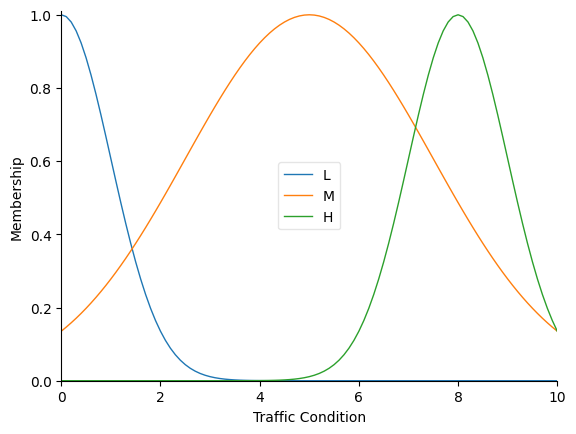

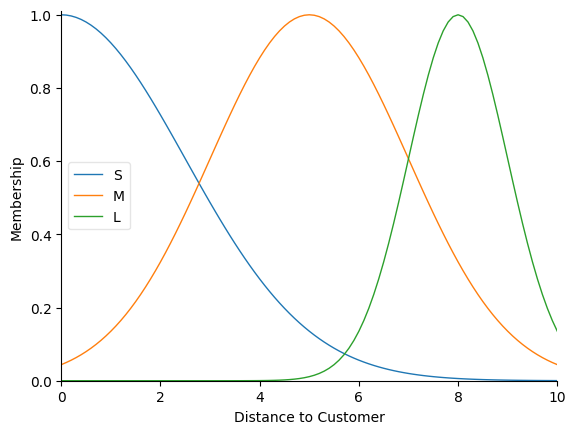

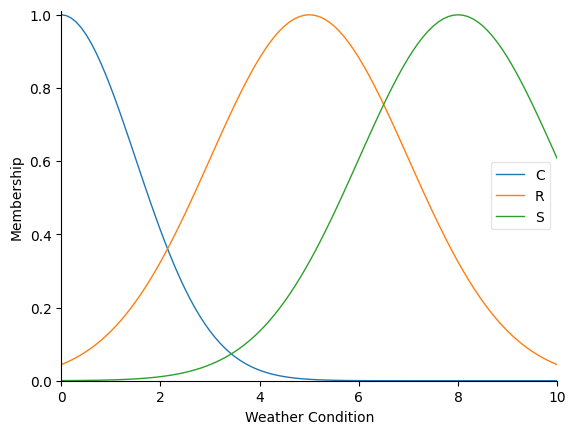

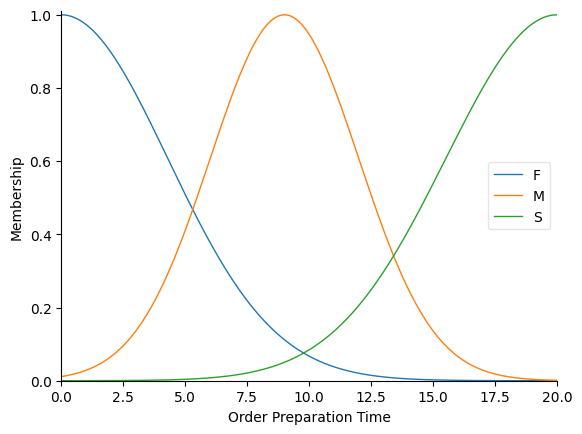

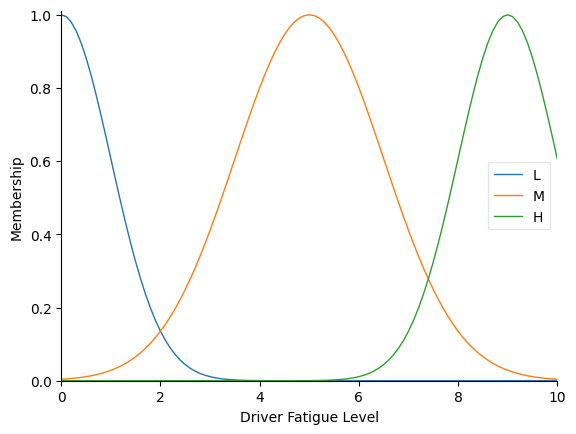

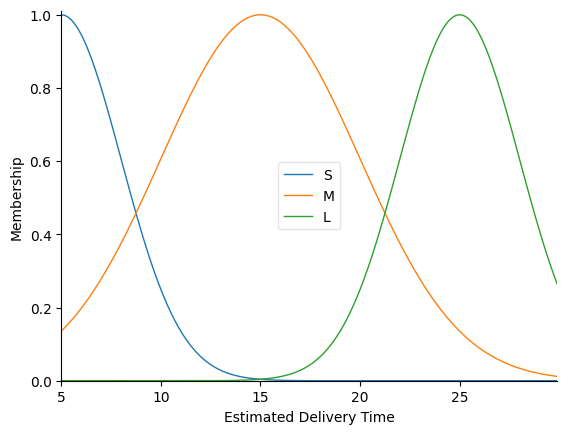

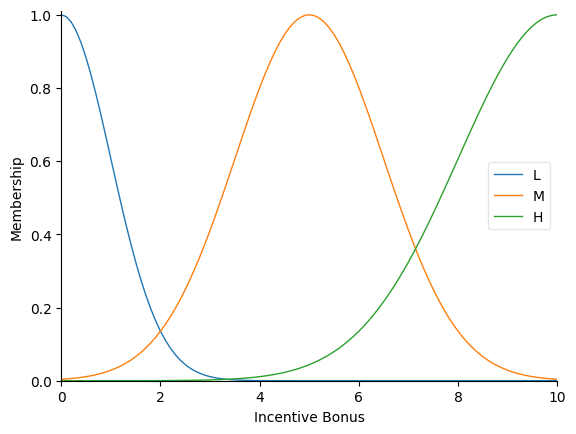

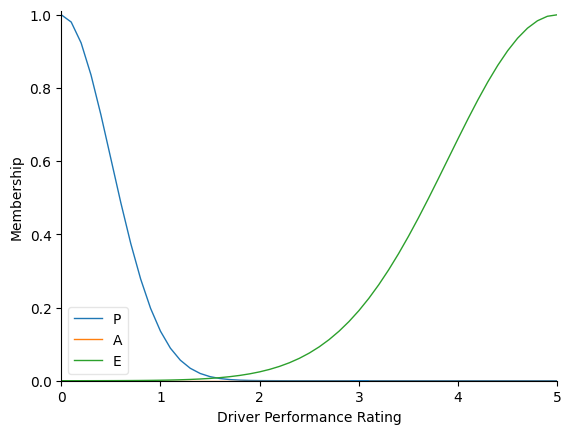

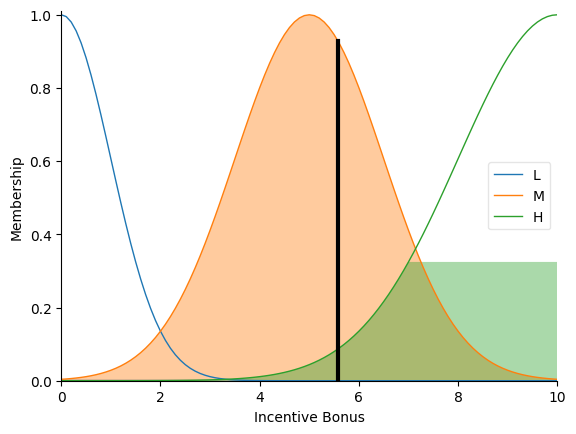

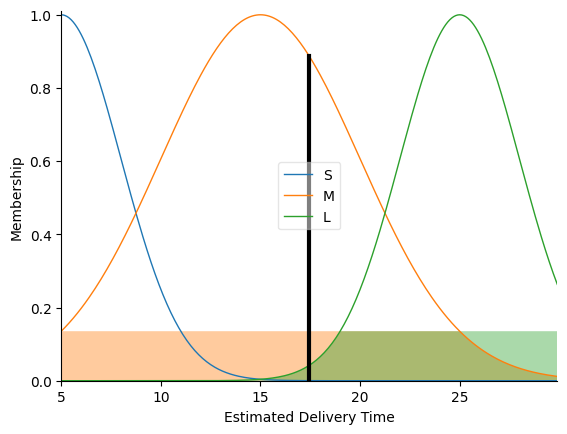

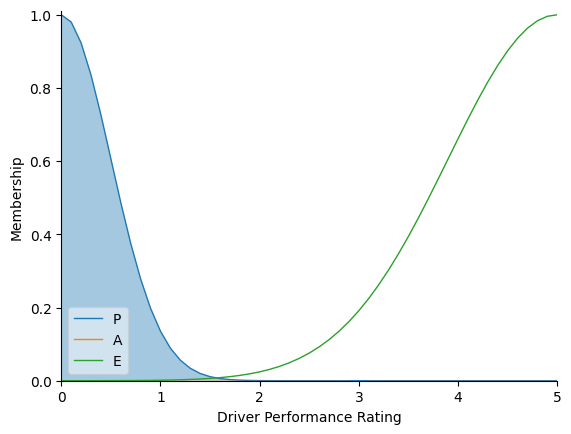

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

TC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Traffic Condition')
DC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Distance to Customer')
WC = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Weather Condition')
OPT = ctrl.Antecedent(np.arange(0, 20.1, 0.1), 'Order Preparation Time')
DFL = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'Driver Fatigue Level')
EDT = ctrl.Consequent(np.arange(5, 30, 0.1), 'Estimated Delivery Time')
IB = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Incentive Bonus')
DPR = ctrl.Consequent(np.arange(0, 5.1, 0.1), 'Driver Performance Rating')

TC['L']=fuzz.gaussmf(TC.universe, 0, 1)
TC['M']=fuzz.gaussmf(TC.universe, 5, 2.5)
TC['H']=fuzz.gaussmf(TC.universe, 8, 1)

DC['S']=fuzz.gaussmf(DC.universe, 0, 2.5)
DC['M']=fuzz.gaussmf(DC.universe, 5, 2)
DC['L']=fuzz.gaussmf(DC.universe, 8, 1)

WC['C']=fuzz.gaussmf(WC.universe, 0, 1.5)
WC['R']=fuzz.gaussmf(WC.universe, 5, 2)
WC['S']=fuzz.gaussmf(WC.universe, 8, 2)

OPT['F']=fuzz.gaussmf(OPT.universe, 0, 4.3)
OPT['M']=fuzz.gaussmf(OPT.universe, 9, 3)
OPT['S']=fuzz.gaussmf(OPT.universe, 20, 4.5)

DFL['L']=fuzz.gaussmf(DFL.universe, 0, 1)
DFL['M']=fuzz.gaussmf(DFL.universe, 5, 1.5)
DFL['H']=fuzz.gaussmf(DFL.universe, 9, 1)

EDT['S']=fuzz.gaussmf(EDT.universe, 5, 3)
EDT['M']=fuzz.gaussmf(EDT.universe, 15, 5)
EDT['L']=fuzz.gaussmf(EDT.universe, 25, 3)

IB['L']=fuzz.gaussmf(IB.universe, 0, 1)
IB['M']=fuzz.gaussmf(IB.universe, 5, 1.5)
IB['H']=fuzz.gaussmf(IB.universe, 10, 2)

DPR['P']=fuzz.gaussmf(DPR.universe, 0, 0.5)
DPR['A']=fuzz.gaussmf(DPR.universe, 3, 0)
DPR['E']=fuzz.gaussmf(DPR.universe, 5, 1.1)

TC.view()
DC.view()
WC.view()
OPT.view()
DFL.view()
EDT.view()
IB.view()
DPR.view()

rule1 = ctrl.Rule(TC['L']&DC['S'], EDT ['S'])
rule2 = ctrl.Rule(TC['M']&DC['M'], EDT ['M'])
rule3 = ctrl.Rule(TC['H']&DC['L'], EDT ['L'])

rule4 = ctrl.Rule(WC['C'], IB ['L'])
rule5 = ctrl.Rule(WC['R'], IB ['M'])
rule6 = ctrl.Rule(WC['S'], IB ['H'])

rule7 = ctrl.Rule(TC['L']&OPT['F'], EDT ['S'])
rule8 = ctrl.Rule(TC['M']&OPT['M'], EDT ['M'])
rule9 = ctrl.Rule(TC['H']&OPT['S'], EDT ['L'])

rule10 = ctrl.Rule(DFL['L'], DPR ['E'])
rule11 = ctrl.Rule(DFL['M'], DPR ['A'])
rule12 = ctrl.Rule(DFL['H'], DPR ['P'])

rule13 = ctrl.Rule(DC['L']&WC['S']&TC['H'], IB['H'], EDT['L'])
rule14 = ctrl.Rule(DC['S']&WC['C']&TC['L'], IB['L'], EDT['S'])
rule15 = ctrl.Rule(DFL['H']&TC['H'], DPR['P'], EDT['L'])

dpr_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13, rule14, rule15])
dpr = ctrl.ControlSystemSimulation(dpr_ctrl)
dpr.input['Traffic Condition'] = 10
dpr.input['Distance to Customer'] = 9
dpr.input['Weather Condition'] = 5
dpr.input['Order Preparation Time'] =11
dpr.input['Driver Fatigue Level'] = 9
dpr.compute()
print(dpr.output['Driver Performance Rating'])
IB.view(sim=dpr)
EDT.view(sim=dpr)
DPR.view(sim=dpr)